# Data Analytics Coursework  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import the dataset
 Print the shape of the dataframe

In [3]:
df = pd.read_csv('london.csv', sep=',',  header=0)
df.shape

(3154384, 17)

 Visualise first 2 rows

In [4]:
df.head(2)

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
0,3,{024F306B-9F59-4D5F-8EE9-B6698ED0A538},93500,1995-07-27 00:00,UB8 2AP,D,N,F,7,NaN,WELLINGTON ROAD,UXBRIDGE,UXBRIDGE,HILLINGDON,GREATER LONDON,A,A
1,9,{DF2A5520-3FFF-4970-BE62-B2E652EAF0DB},139950,1995-09-15 00:00,HA5 2TP,D,N,F,1,NaN,BURLINGTON CLOSE,PINNER,PINNER,HILLINGDON,GREATER LONDON,A,A


 Remove the first column

In [5]:
df.drop(columns=['Unnamed: 0'],inplace=True)
df.shape

(3154384, 16)

In [6]:
df.rename(columns={'V1':'uniqueId',
                   'V2':'Price',
                    'V3':'dateOfTransfer',
                    'V4':'postCode',
                    'V5':'propertyType',
                    'V6':'oldNew',
                    'V7':'duration',
                    'V8':'PAON',
                    'V9':'SAON',
                    'V10':'Street',
                    'V11':'locality',
                    'V12':'townCity',
                    'V13':'district',
                    'V14':'county',
                    'V15':'ppdCategoryType',
                    'V16':'recordStatus'},
          inplace = True)
df.head(2)

,uniqueId,Price,dateOfTransfer,postCode,propertyType,oldNew,duration,PAON,SAON,Street,locality,townCity,district,county,ppdCategoryType,recordStatus
0,{024F306B-9F59-4D5F-8EE9-B6698ED0A538},93500,1995-07-27 00:00,UB8 2AP,D,N,F,7,NaN,WELLINGTON ROAD,UXBRIDGE,UXBRIDGE,HILLINGDON,GREATER LONDON,A,A
1,{DF2A5520-3FFF-4970-BE62-B2E652EAF0DB},139950,1995-09-15 00:00,HA5 2TP,D,N,F,1,NaN,BURLINGTON CLOSE,PINNER,PINNER,HILLINGDON,GREATER LONDON,A,A


In [7]:
bydistrict = df.groupby(['district'],as_index = False).size()
bydistrict.nlargest(10)

district
WANDSWORTH             164837
BROMLEY                147072
CROYDON                146442
BARNET                 134914
LAMBETH                118519
ENFIELD                115861
CITY OF WESTMINSTER    112868
EALING                 111192
LEWISHAM               109099
HILLINGDON             103721
dtype: int64

In [15]:
byprice = df.groupby(['district'])['Price'].mean()
byprice.nlargest(33)

district
CITY OF LONDON            1.431122e+06
KENSINGTON AND CHELSEA    9.541476e+05
CITY OF WESTMINSTER       8.848172e+05
CAMDEN                    6.222021e+05
HAMMERSMITH AND FULHAM    5.077998e+05
RICHMOND UPON THAMES      4.376218e+05
ISLINGTON                 4.353145e+05
WANDSWORTH                4.038852e+05
SOUTHWARK                 3.667139e+05
TOWER HAMLETS             3.481050e+05
BARNET                    3.449378e+05
HACKNEY                   3.310503e+05
LAMBETH                   3.240180e+05
MERTON                    3.214500e+05
EALING                    3.069491e+05
HARINGEY                  3.062620e+05
KINGSTON UPON THAMES      3.017592e+05
BRENT                     2.893949e+05
HOUNSLOW                  2.885858e+05
HARROW                    2.771112e+05
BROMLEY                   2.760867e+05
HILLINGDON                2.585903e+05
GREENWICH                 2.544357e+05
REDBRIDGE                 2.321226e+05
LEWISHAM                  2.294176e+05
ENFIELD         

In [9]:
mixed = pd.concat([byprice, bydistrict], axis = 1)
mixed.columns = ['Price','count']
#mixed['District'] = mixed.index
mixed = mixed[['Price', 'count']]
mixed.reset_index()
mixed.sort_values('count', ascending = False)

,Price,count
district,,
WANDSWORTH,4.038852e+05,164837
BROMLEY,2.760867e+05,147072
CROYDON,2.214633e+05,146442
BARNET,3.449378e+05,134914
LAMBETH,3.240180e+05,118519
ENFIELD,2.274212e+05,115861
CITY OF WESTMINSTER,8.848172e+05,112868
EALING,3.069491e+05,111192
LEWISHAM,2.294176e+05,109099


Subset of year 2018

In [30]:
#df.plot(kind='bar',x='district',y='Price')
df_2018 = df[pd.DatetimeIndex(df['dateOfTransfer']).year == 2018]
#pd.DatetimeIndex(df['dateOfTransfer']).year == 2018
df_2018.head(2)

,uniqueId,Price,dateOfTransfer,postCode,propertyType,oldNew,duration,PAON,SAON,Street,locality,townCity,district,county,ppdCategoryType,recordStatus
3058058,{7E86B6FB-BB95-458C-E053-6B04A8C0C84C},366193,2018-10-26 00:00,CR0 1FW,F,Y,L,"LEON HOUSE, 233",FLAT 20,HIGH STREET,NaN,CROYDON,CROYDON,GREATER LONDON,B,A
3058059,{7E86B6FB-BB96-458C-E053-6B04A8C0C84C},366193,2018-10-26 00:00,CR0 1FW,F,Y,L,"LEON HOUSE, 233",FLAT 21,HIGH STREET,NaN,CROYDON,CROYDON,GREATER LONDON,B,A


Plot of 2018

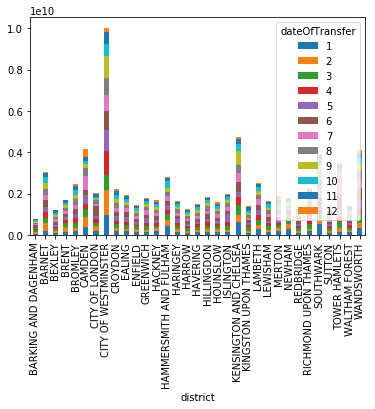

In [11]:
df_2018.groupby(['district',pd.DatetimeIndex(df_2018['dateOfTransfer']).month])['Price'].agg('sum').unstack().plot(kind='bar',stacked=True)
plt.show()

In [36]:
df_wandsworth = df.loc[df['district']=='WANDSWORTH']
df_wandsworth.head(2)

,uniqueId,Price,dateOfTransfer,postCode,propertyType,oldNew,duration,PAON,SAON,Street,locality,townCity,district,county,ppdCategoryType,recordStatus
21,{EBAB1E9F-9D2A-43A6-86C7-D02FE86C1DD0},92000,1995-05-25 00:00,SW11 1QD,F,N,L,32A,NaN,COMYN ROAD,LONDON,LONDON,WANDSWORTH,GREATER LONDON,A,A
23,{DED4E551-6B96-40FB-98E9-8AC3B9071356},128500,1995-03-01 00:00,SW18 5DH,T,N,F,149,NaN,TRENTHAM STREET,LONDON,LONDON,WANDSWORTH,GREATER LONDON,A,A


In [40]:
df_bromley = df.loc[df['district']=='BROMLEY']
df_bromley.head(2)

,uniqueId,Price,dateOfTransfer,postCode,propertyType,oldNew,duration,PAON,SAON,Street,locality,townCity,district,county,ppdCategoryType,recordStatus
6,{F7EABC12-2FBB-4D78-9C9A-B2E77F0AE34B},74000,1995-03-17 00:00,BR3 4JE,F,N,L,3,NaN,CEDARS ROAD,BECKENHAM,BECKENHAM,BROMLEY,GREATER LONDON,A,A
17,{8B7203C0-A7B2-4A45-BD97-D3B780F1C02B},195000,1995-04-28 00:00,BR6 0ER,D,N,F,GARTH,NaN,OATFIELD ROAD,ORPINGTON,ORPINGTON,BROMLEY,GREATER LONDON,A,A


In [46]:
df_croydon = df.loc[df['district']=='CROYDON']
df_croydon.head(2)

,uniqueId,Price,dateOfTransfer,postCode,propertyType,oldNew,duration,PAON,SAON,Street,locality,townCity,district,county,ppdCategoryType,recordStatus
2,{66FEF64F-25F3-4921-9D5E-B69E40568F0B},54000,1995-11-22 00:00,CR0 4LP,T,N,F,7,NaN,BOROUGH HILL,CROYDON,CROYDON,CROYDON,GREATER LONDON,A,A
18,{0E3391C3-B511-441D-8E32-D3B78FE73905},93000,1995-06-09 00:00,CR5 2HP,D,N,F,1,NaN,STONEYFIELD ROAD,COULSDON,COULSDON,CROYDON,GREATER LONDON,A,A


In [48]:
df_westminster = df.loc[df['district']=='CITY OF WESTMINSTER']
df_westminster.head(2)

,uniqueId,Price,dateOfTransfer,postCode,propertyType,oldNew,duration,PAON,SAON,Street,locality,townCity,district,county,ppdCategoryType,recordStatus
26,{8D28EE68-8F4F-4C7D-8A33-8E6335277383},180000,1995-11-16 00:00,NW8 9AA,F,N,L,7B,NaN,ABBEY ROAD,LONDON,LONDON,CITY OF WESTMINSTER,GREATER LONDON,A,A
40,{958F75D1-1D97-4221-BFB4-CE0EC069B2DF},950000,1995-02-01 00:00,NW8 0PS,S,N,F,57,NaN,MARLBOROUGH PLACE,LONDON,LONDON,CITY OF WESTMINSTER,GREATER LONDON,A,A


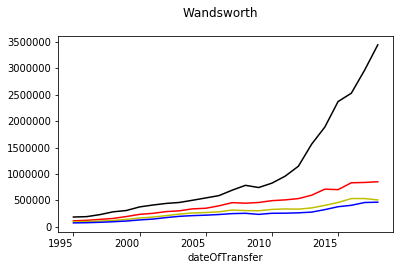

In [49]:
df_wandsworth.groupby([pd.DatetimeIndex(df_wandsworth['dateOfTransfer']).year])['Price'].mean().plot(kind = 'line', title = 'Wandsworth', subplots = 'True', color = 'r')
df_bromley.groupby([pd.DatetimeIndex(df_bromley['dateOfTransfer']).year])['Price'].mean().plot(kind = 'line', color = 'y')
df_croydon.groupby([pd.DatetimeIndex(df_croydon['dateOfTransfer']).year])['Price'].mean().plot(kind = 'line', color = 'b')
df_westminster.groupby([pd.DatetimeIndex(df_westminster['dateOfTransfer']).year])['Price'].mean().plot(kind = 'line', color = 'black')
plt.show()